## 1. Structure & Guidelines

The most important thing to do is define your problem statement (with your partner). This will be your nexus and will help you choose the dataset. Ideally this is the problem that you work on for the rest of the project. Since this is a big decision, you can change the problem statement and the dataset in the next assignment but no changes after that.

### Where to look for a dataset
There are too many sources for me to name all of them. **Kaggle** is the most popular. To search you can just use google or **Google Dataset Search** specifically. A lot of universities have their datasets available, like the one I use in my example below, which can be a great resource too. 


### EDA Study
Here are some mandatory material to help you get a basic understanding:
- https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/
- https://www.youtube.com/watch?v=9m4n2xVzk9o

The sky is the limit with EDA, use this as a starting point and I expect you to go beyond. For instance I personally love this free book https://jakevdp.github.io/PythonDataScienceHandbook/ that dives deep into data science with python. <br>
This book is entirely in jupyter notebooks for even more code examples: https://allendowney.github.io/ElementsOfDataScience/


### Working with partners
To reiterate, you will decide the problem statement and the dataset together with you partner(s). I encourage you to work on the assignments together, disucss analytical processes and insights. If you are more experienced/knowledgable than your partner, please take the lead and help them understand any difficult concepts. 

**The idea is to foster collaboration and get support on the path to self-suffciency.**<br>
This means your assignment submissions, your final analyses and dashboard has to be completely your own. You should work on those independently. <br>
For example, discussing a specific assignent task is okay but copying your partners answers is not. Attempt to understand from them and write what you know so when I give my feedback it is valuable.

## 2. Assignment Questions/Tasks

1) Discuss & write down a problem statement
2) Find a Dataset(s) that will help you solve your problem
3) EDA Study: Go through the guides I link above and my example to get different perspective of how to approach EDA
4) Start your EDA by emulating the steps I take below and start forming hypotheses about the dataset and getting insights
5) Use 5 more visualizations or techniques of your choice that I dont use below
6) Write down insights about the dataset and how it relates back to your problem!!

## 3. Exploratory Data Analysis

This is the same example from class. I have kept things basic and barebones here so this can serve as a springboard for your analyses. In each step I have added some questions you should ask to get insights into the dataset. The answers to these and other questions that you ask might be through more statistical analysis and visualizations!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from ucimlrepo import fetch_ucirepo 

sns.set(style="whitegrid")

### 1. Data Loading & Quick Overview

In [4]:
#Your dataset here
adult_income_dataset = fetch_ucirepo(id=2) #details here https://archive.ics.uci.edu/dataset/2/adult, click on the import in python button to check it out
df = adult_income_dataset.data.original

In [6]:
# Display first few rows
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Questions to ponder: 

1. Does the data match your expectations or do you think you might need more information?
2. Do the columns/features align with your problem statement?
3. Any immediate signs of missing or corrupted data? 


### 2. Shape & Features

In [7]:
# Shape : (rows, columns)
print(f"Dataset shape: {df.shape}")

# Display all column names
print("\nFeature Names:")
print(df.columns.tolist())

Dataset shape: (48842, 15)

Feature Names:
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


#### Questions to ponder: 

1. Is the data large enough for the analysis?
2. Are there any duplicate columns, or columns with similar information or ones that need re-naming? (I renamed some columns in my dataset below)

In [8]:
#replacing "-" with "_"
df.columns = df.columns.str.replace("-","_")
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [9]:
#Get unique target values
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

### 3. Data Types & Missing Values

In [10]:
# understanding the datatypes
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [11]:
# Check missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64


#### Questions to ponder: 

- Should we drop or impute missing values?
- Could missing data be an insight in and of itself?

### 4. Summary Statistics & Outlier Detection

In [12]:
#Summary Stats
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#### Question to ponder
- Did you expect outliers? 
- Which features have unusually high or low values? What do they tell us about the data?
- Are there any suspicious patterns or extreme outliers?
- Do we need to drop or transform these outliers?

In [13]:
df["capital_gain"].value_counts().head(20)

capital_gain
0        44807
15024      513
7688       410
7298       364
99999      244
3103       152
5178       146
5013       117
4386       108
8614        82
3325        81
2174        74
10520       64
4650        63
27828       58
4064        54
594         52
3137        51
14084       49
20051       49
Name: count, dtype: int64

### 5. Univariate Analysis

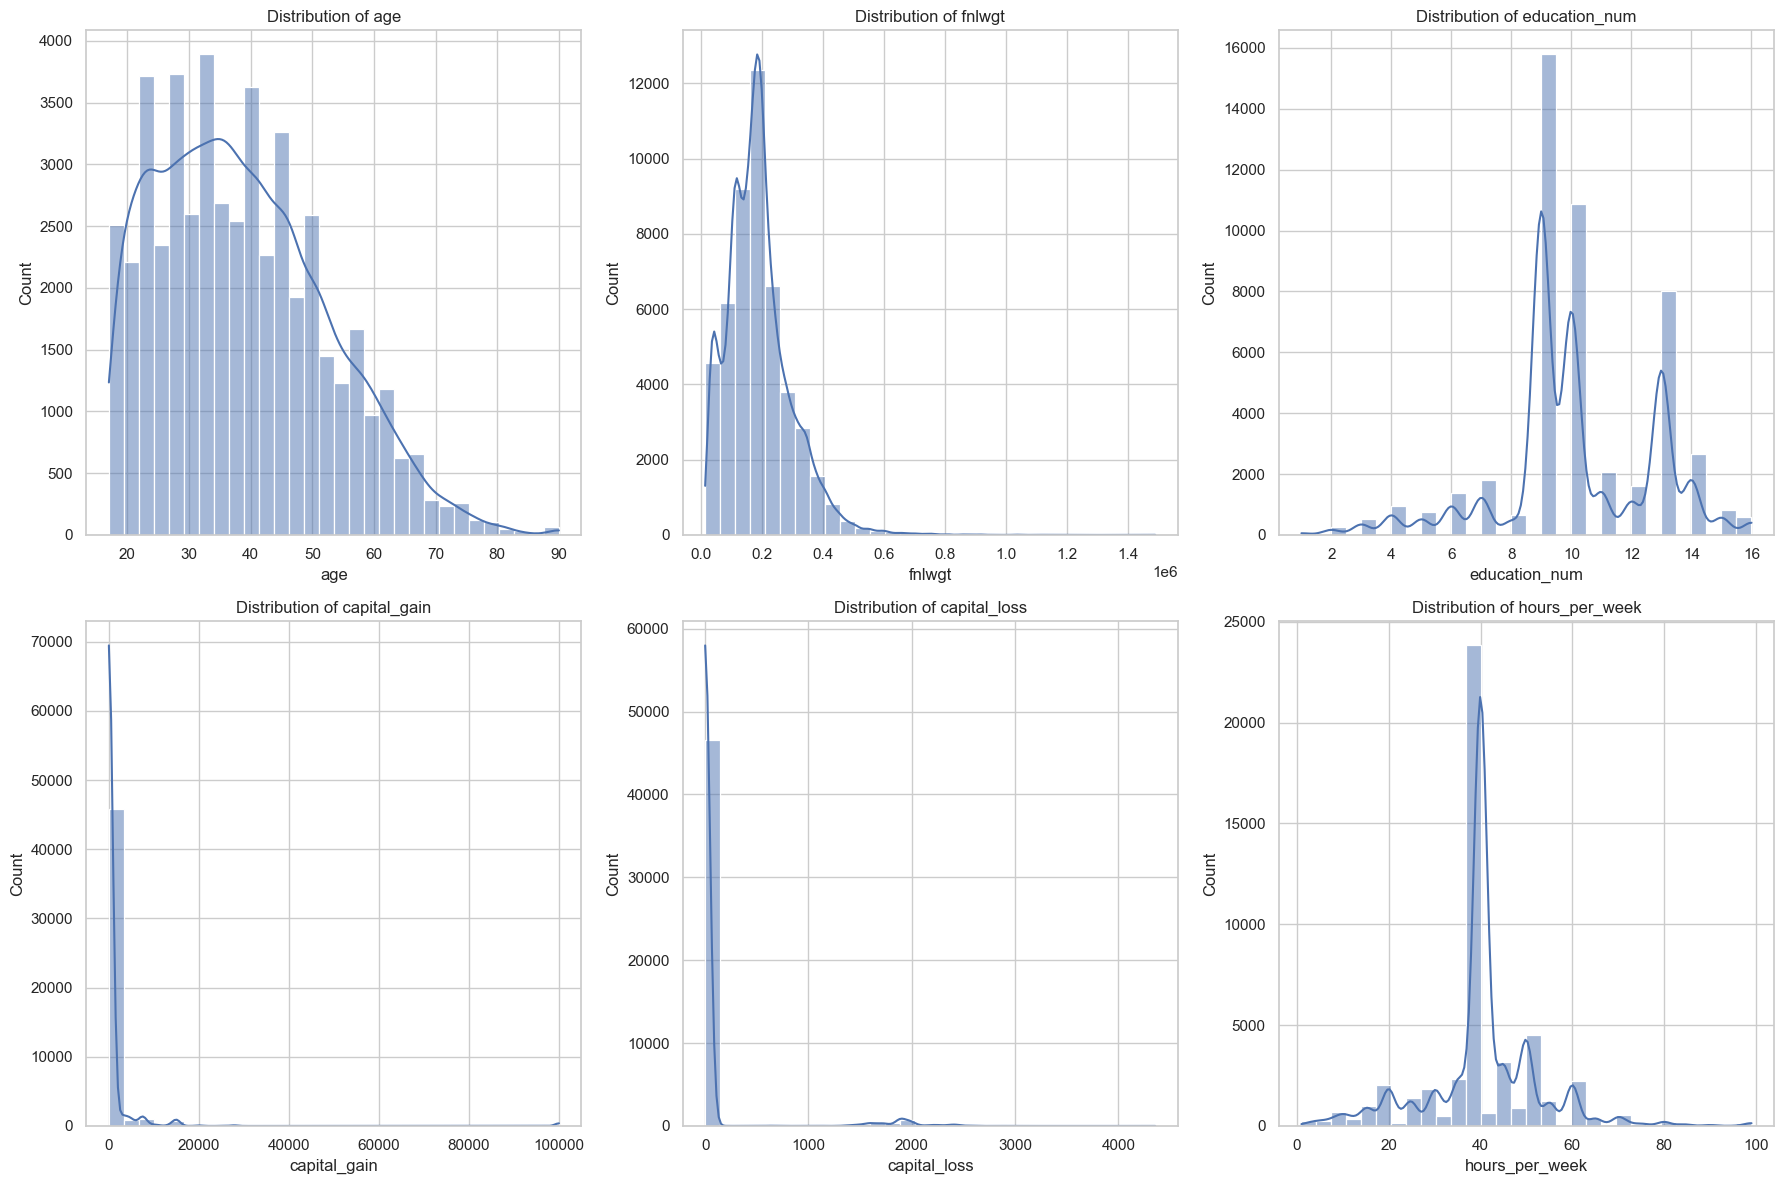

In [14]:
# Define features for visualization (Choosing the numerical features)
num_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Create a 2x3 grid for visualization
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Iterate over features and plot
for i, feature in enumerate(num_features):
    row, col = divmod(i, 3)
    sns.histplot(df[feature], kde=True, bins=30, ax=ax[row, col])
    ax[row, col].set_title(f'Distribution of {feature}')
    
plt.tight_layout()
plt.show()

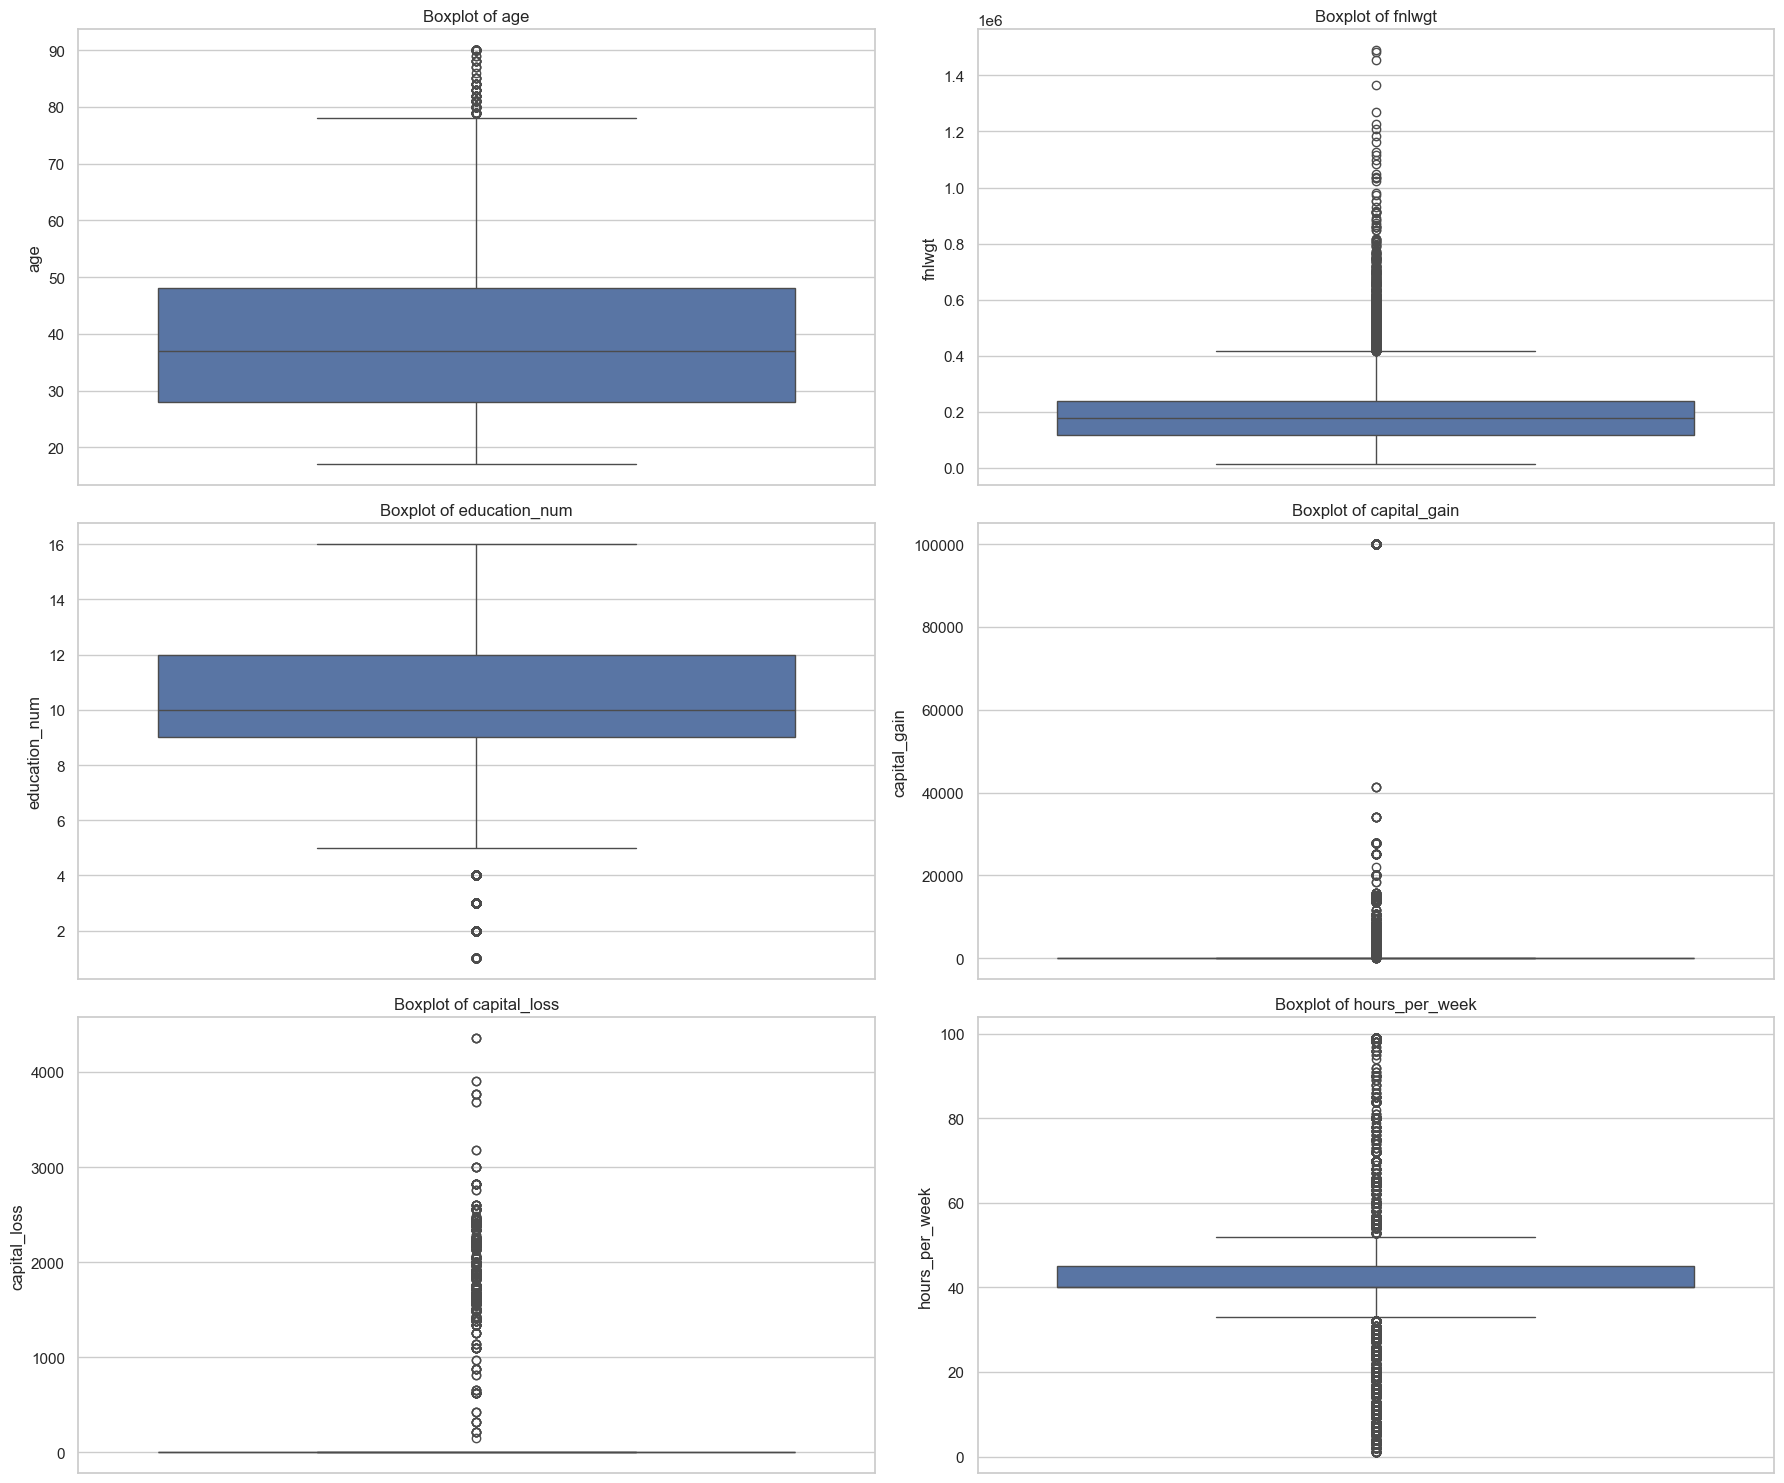

In [15]:
# Create boxplots for numerical variables
fig, ax = plt.subplots(3, 2, figsize=(18, 15))

for i, feature in enumerate(num_features):
    row, col = divmod(i, 2)
    sns.boxplot(y=df[feature], ax=ax[row, col])
    ax[row, col].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


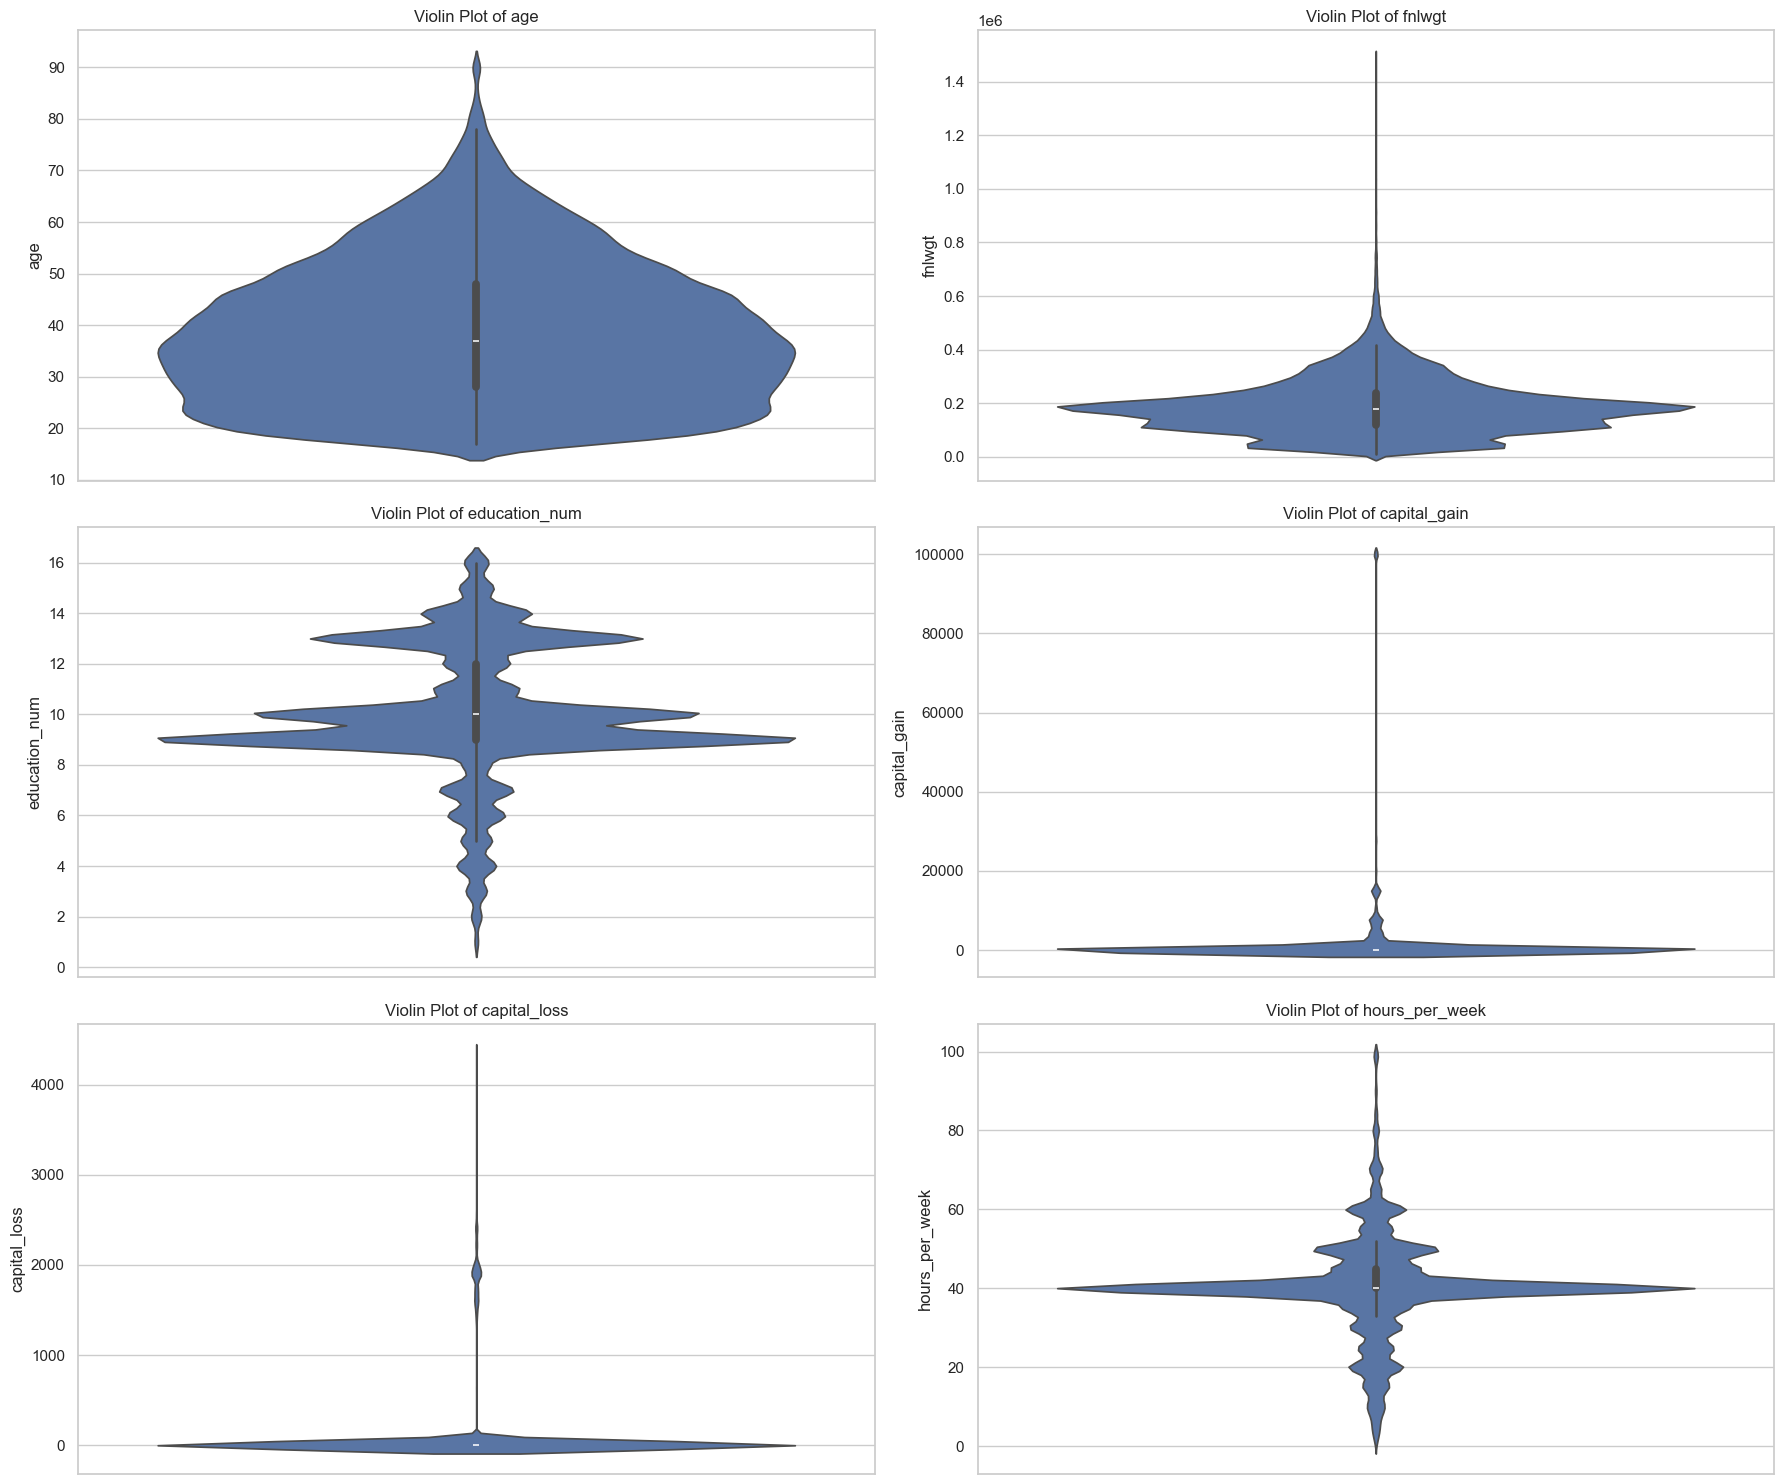

In [16]:
# Create violin plots for numerical variables
fig, ax = plt.subplots(3, 2, figsize=(18, 15))

for i, feature in enumerate(num_features):
    row, col = divmod(i, 2)
    sns.violinplot(y=df[feature], ax=ax[row, col])
    ax[row, col].set_title(f'Violin Plot of {feature}')

plt.tight_layout()
plt.show()


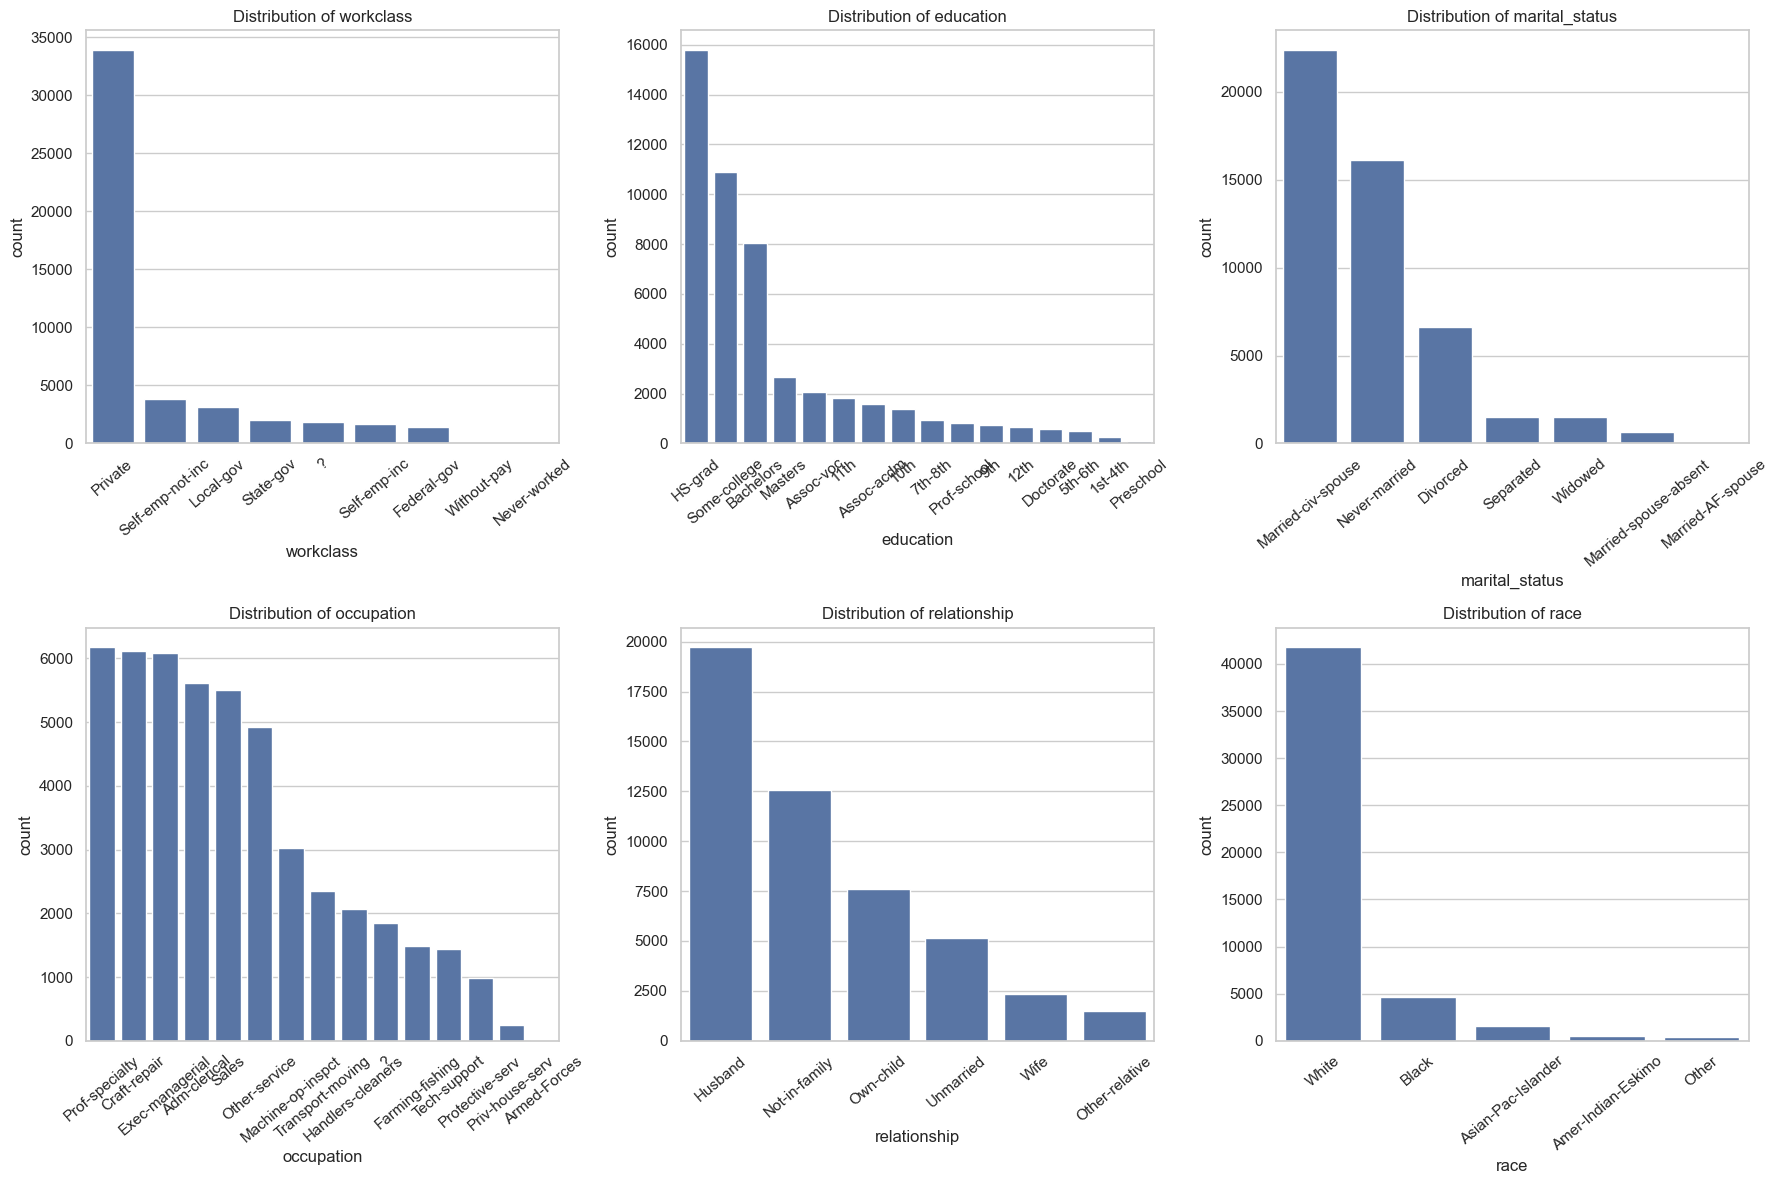

In [17]:
# Define categorical features for visualization
cat_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race']

# Create a 2x3 grid for visualization
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Iterate over categorical features and plot
for i, feature in enumerate(cat_features):
    row, col = divmod(i, 3)
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, ax=ax[row, col])
    ax[row, col].set_title(f'Distribution of {feature}')
    ax[row, col].tick_params(axis='x', rotation=40)  # Rotate x-axis labels for better readability
    
plt.tight_layout()
plt.show()

#### Questions to ponder:

- Are the numerical features skewed or roughly normal?
- Which categories dominate in each categorical feature? What does that tell you about each feature? 


### 6. Bivariate Analysis

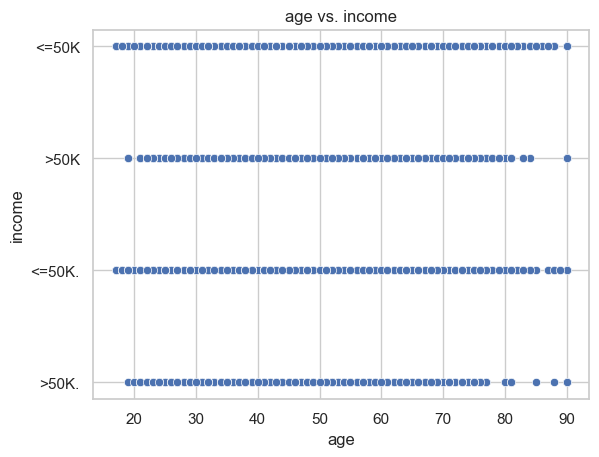

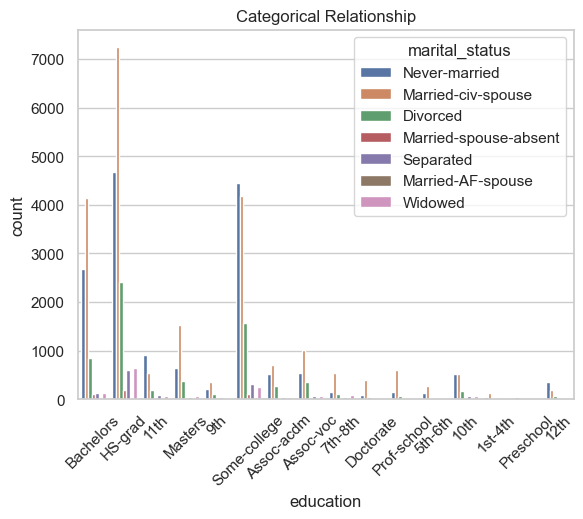

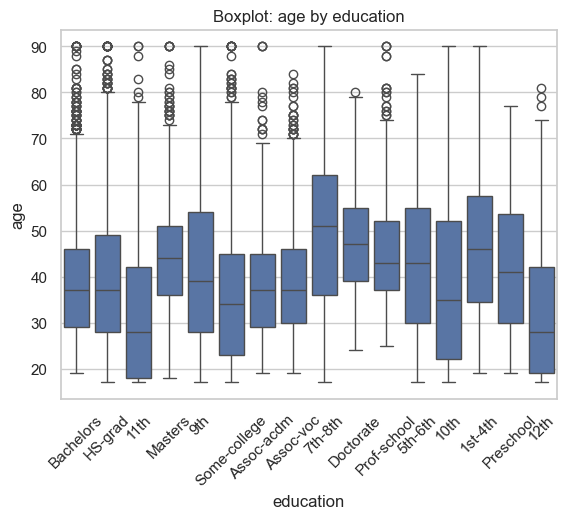

In [18]:
# Scatter plot for numerical vs. numerical
sns.scatterplot(data=df, x='age', y='income')
plt.title("age vs. income")
plt.show()

# Grouped bar plot for categorical vs. categorical
sns.countplot(data=df, x='education', hue='marital_status')
plt.title("Categorical Relationship")
plt.xticks(rotation=45)
plt.show()

# Box plot for numerical vs. categorical
sns.boxplot(data=df, x='education', y='age')
plt.title("Boxplot: age by education")
plt.xticks(rotation=45)
plt.show()

#### Questions to ponder

- Which numerical features are correlated?
- Do certain categories strongly associate with higher or lower numerical values?
- Any visible clusters or patterns in scatter plots?

### 7. Multivariate Analysis

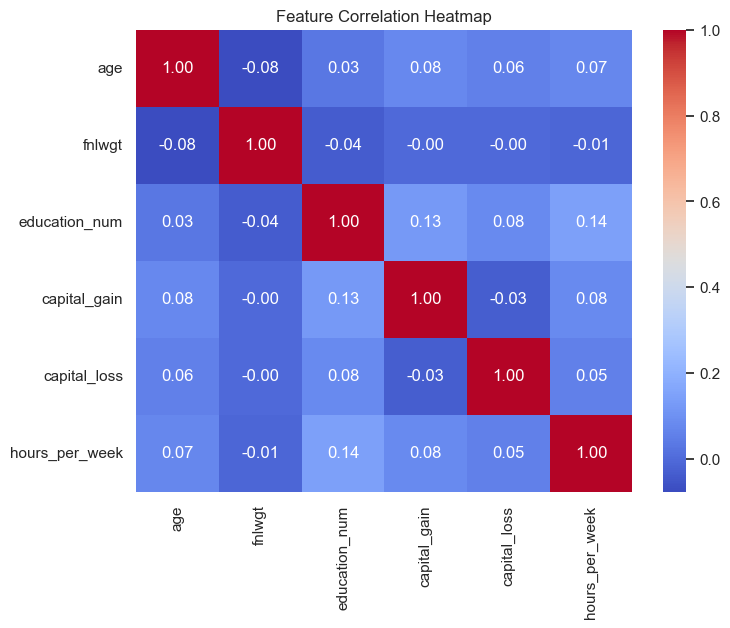

In [19]:
# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#### Questions to ponder

- Which features show strong correlation?
- Should we remove or combine highly correlated features?
- Are there surprising correlations that warrant deeper investigation?

### 8. Next Steps

- Which features appear most important for the problem?
- What data cleaning or transformation steps remain?
- How will these insights guide the next phase (modeling, reporting, or business decisions)?

## Resources
- Another amazing free book I have used : https://greenteapress.com/thinkstats/thinkstats.pdf
- https://towardsdatascience.com/data-science-101-life-cycle-of-a-data-science-project-86cbc4a2f7f0/